In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from utils.pred_and_anno import fetch_predicted_bbox_by_image_id

In [2]:
pred_bbox_by_image_id = fetch_predicted_bbox_by_image_id()

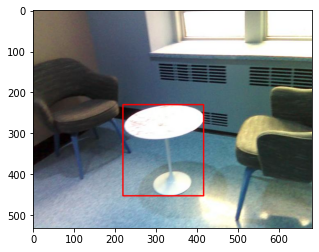

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


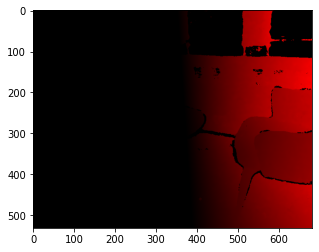

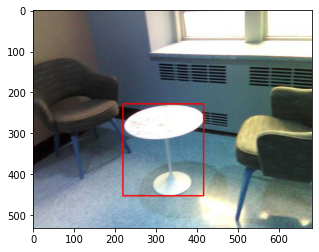

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


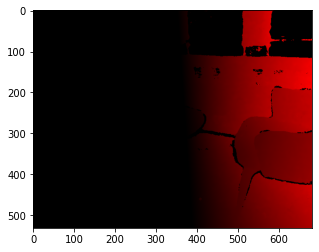

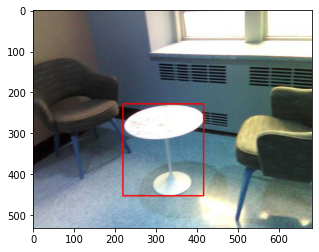

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


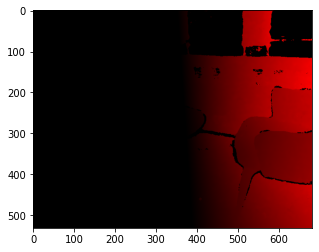

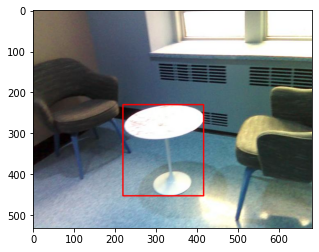

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


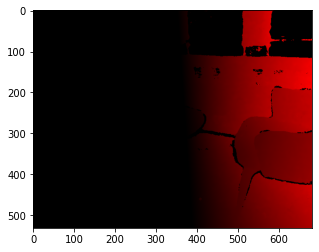

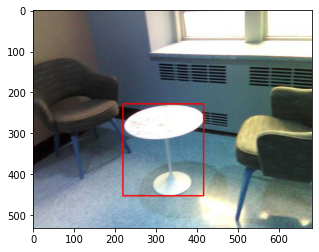

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


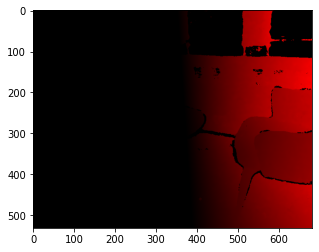

In [3]:
from utils.directory import fetch_rgb_path, fetch_xyzrgb_pcd_path, fetch_xyzrgb_mask_path

image_id = '004835'


pred_bbox_list = pred_bbox_by_image_id[image_id]
for uniq_id, bbox_2d in pred_bbox_list:
    rgb = cv2.imread(str(fetch_rgb_path(image_id)))
    pcd = np.load(str(fetch_xyzrgb_pcd_path(image_id)))
    mask = np.load(str(fetch_xyzrgb_mask_path(image_id)))
    height, width = rgb.shape[0], rgb.shape[1]

    x1 = int(max(0, min(width - 1, bbox_2d[0])))
    y1 = int(max(0, min(height - 1, bbox_2d[1])))
    w = int(bbox_2d[2])
    h = int(bbox_2d[3])
    x2 = int(max(0, min(width, x1 + w)))
    y2 = int(max(0, min(height, y1 + h)))
    cv2.rectangle(rgb, (x1, y1), (x2, y2), (255, 0, 0), 2, cv2.LINE_AA)
    plt.imshow(rgb)
    plt.show()
    plt.imshow(pcd[:, :, :3])
    plt.show()

In [4]:
from scripts.compute_iou import PredictionVisualizer

vis = PredictionVisualizer(
        aabb=True,
        highlight=True,
        apply_seg_out_mask=True,
        verbose=False,
        bbox_2d_ratio=1.0,
        pcd_th_ratio=0.1,
        mask_ratio=0.8)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


/home/junha/projects/sunrefer_util/scripts/compute_iou.py:338: RuntimeWarning: invalid value encountered in double_scalars
  xx = X / Z * fx + cx
/home/junha/projects/sunrefer_util/scripts/compute_iou.py:339: RuntimeWarning: invalid value encountered in double_scalars
  yy = Y / Z * fy + cy


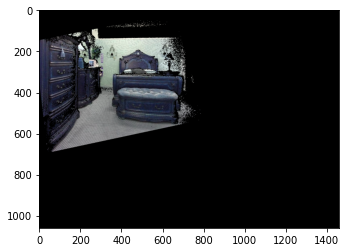

In [5]:
image_id = '000001'
xyzrgb, aabb_list, mask = vis.extract_rgbxyz_pcd(image_id)

WARNING - 2022-05-14 20:44:39,149 - image - Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


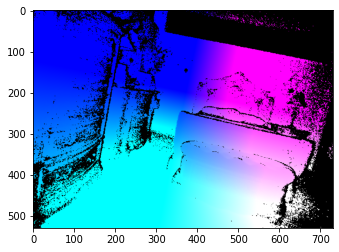

In [6]:
xyz = xyzrgb[..., :3]
plt.imshow(xyz)
plt.show()

False
False
False


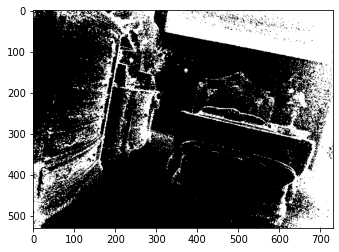

In [9]:
from PIL import Image
print(mask[500, 300])
print(mask[500, 200])
print(mask[500, 400])
plt.imshow(Image.fromarray(mask))
plt.show()

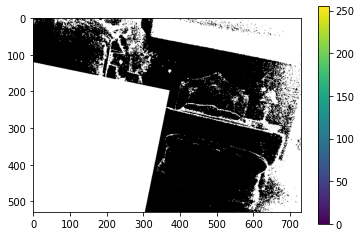

In [48]:
from PIL import Image
image_id = '000001'
# mask = np.load(str(fetch_xyzrgb_mask_path(image_id)))
# mask_np = mask.astype(np.float32)
mask = Image.fromarray(np.load(str(fetch_xyzrgb_mask_path(image_id))))
# print(np.sum(mask == True))
# print(np.sum(mask == False))
# print(mask[200, 300])
# plt.imshow(mask_np)
plt.imshow(mask)
plt.colorbar()
plt.show()